In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


In [339]:
#load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [340]:
data.info()
# doesn't look like any null values, types seem consistent - age might be better as int
data["age"] = data["age"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
<class 'pandas.cor

In [341]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [342]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

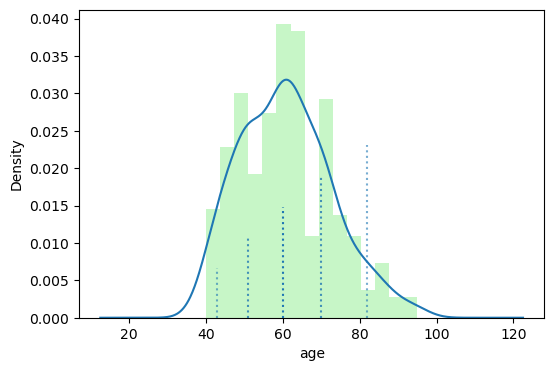

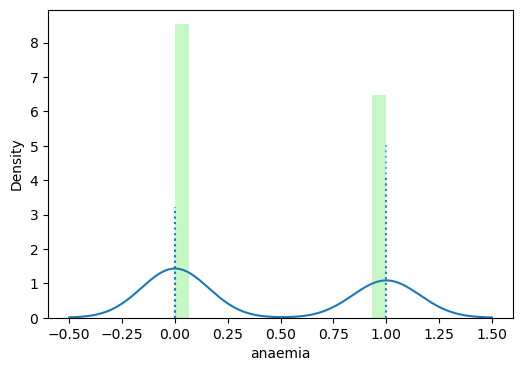

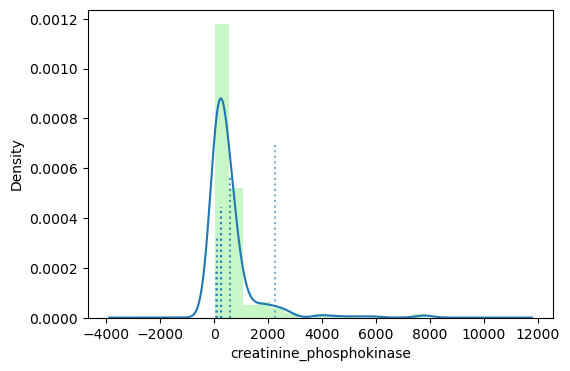

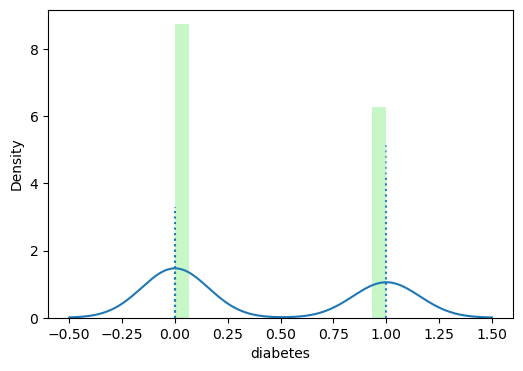

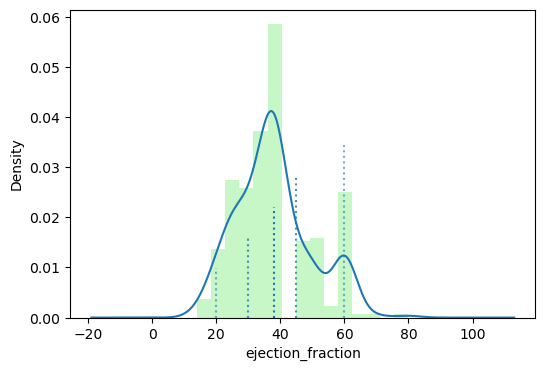

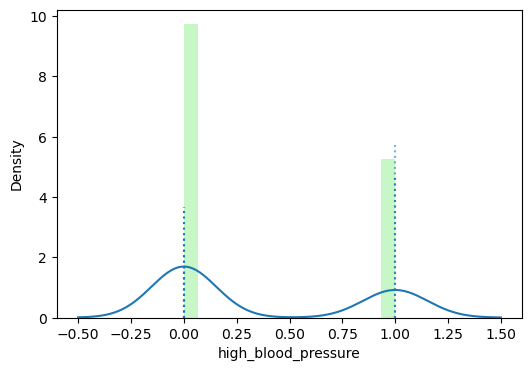

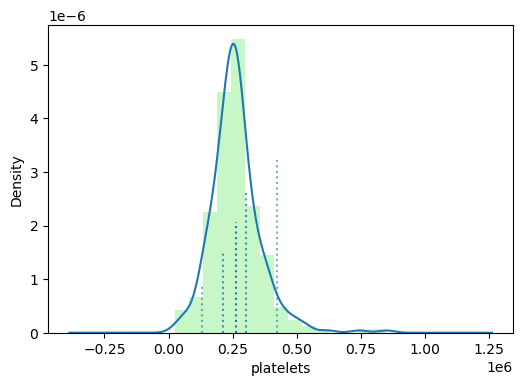

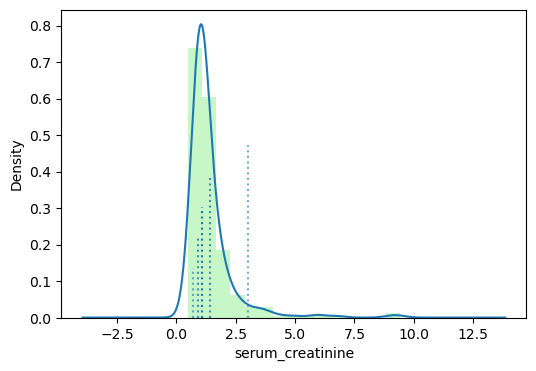

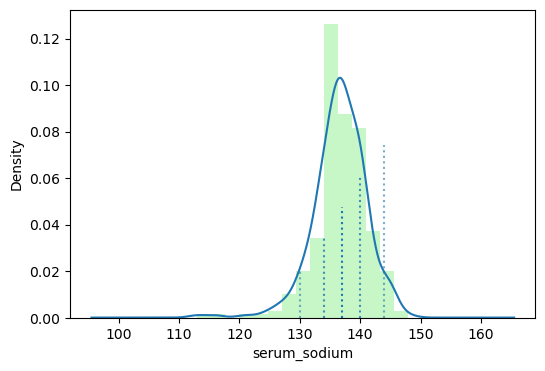

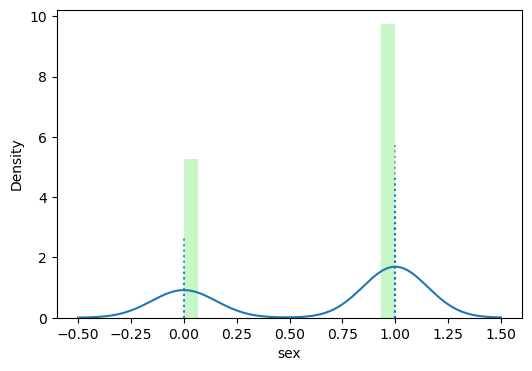

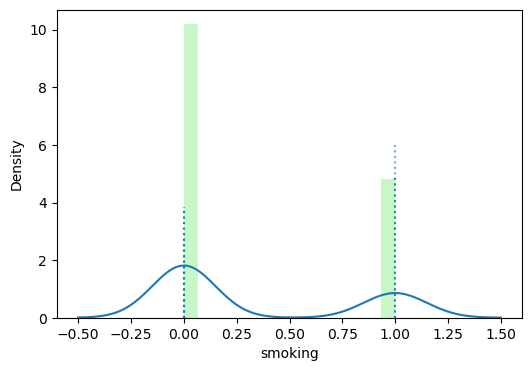

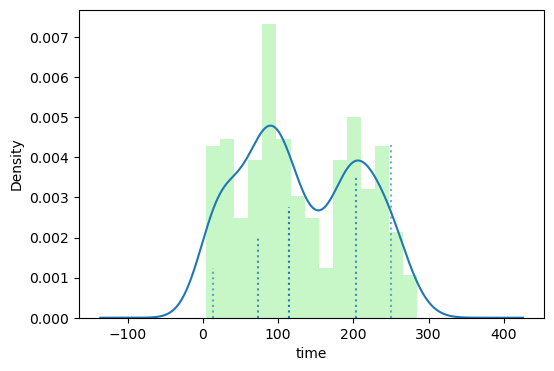

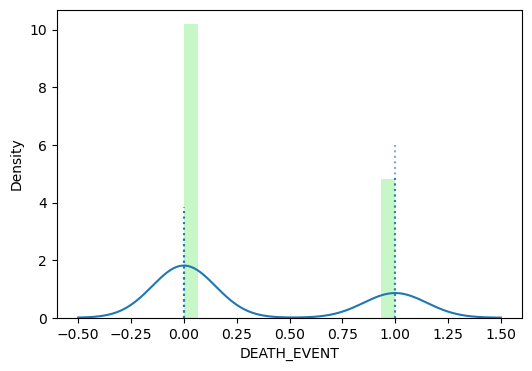

In [343]:
for x in data:    
    fig, ax = plt.subplots(figsize = (6,4))
    data[x].plot(kind = "hist", density = True, bins = 15, alpha = 0.5, color = "lightgreen")
    ax.set_xlabel(f"{x}")
    data[x].plot(kind = "kde")

    quant_5, quant_25, quant_50, quant_75, quant_95 = data[x].quantile(0.05), data[x].quantile(0.25), data[x].quantile(0.5), data[x].quantile(0.75), data[x].quantile(0.95)

# [quantile, opacity, length]
    quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
    for i in quants:
        ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")

    plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

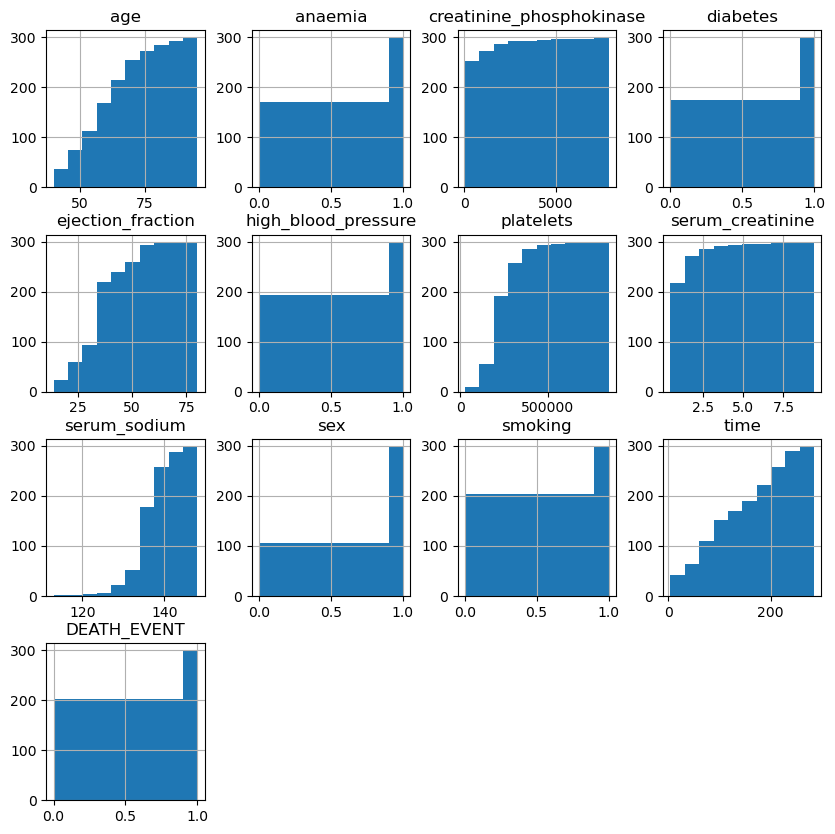

In [344]:
data.hist(figsize=(10,10), cumulative = True )

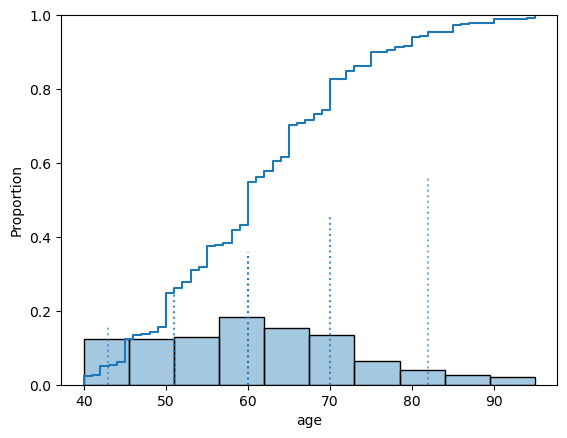

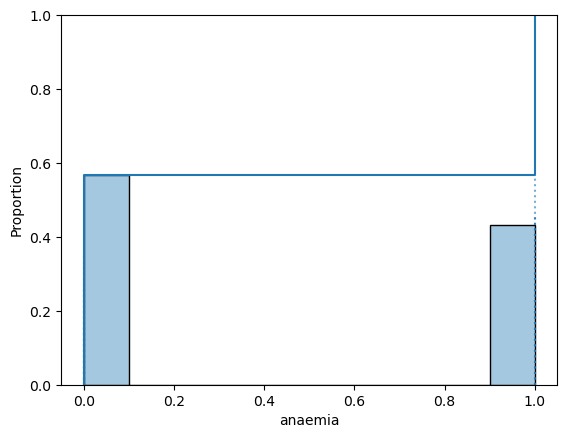

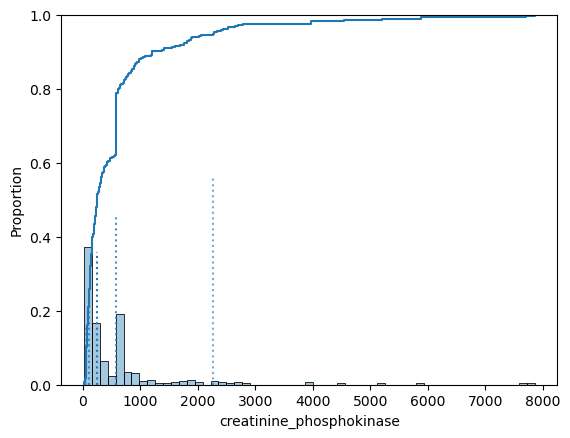

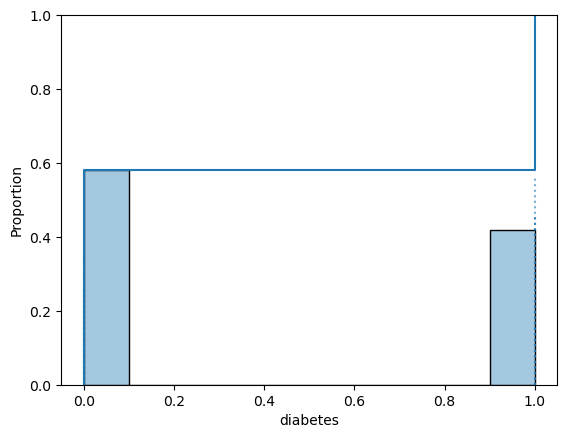

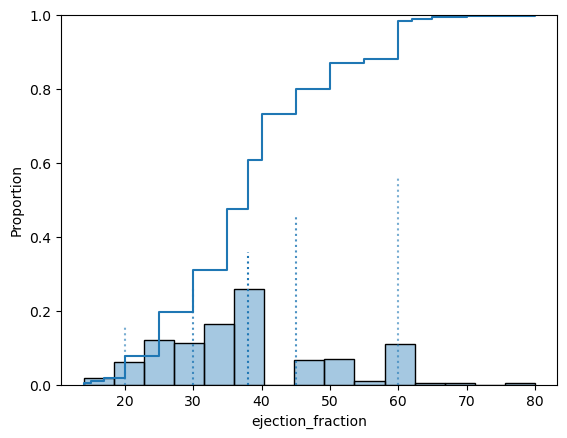

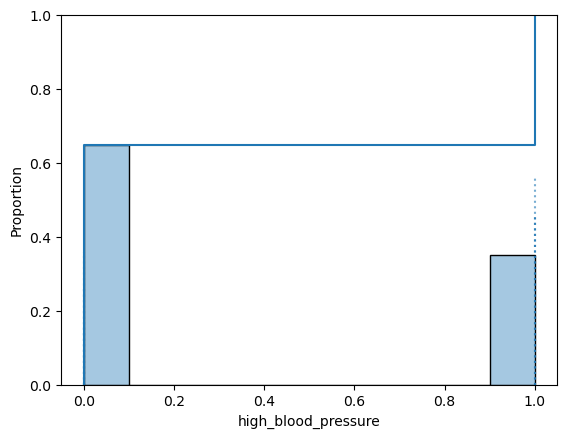

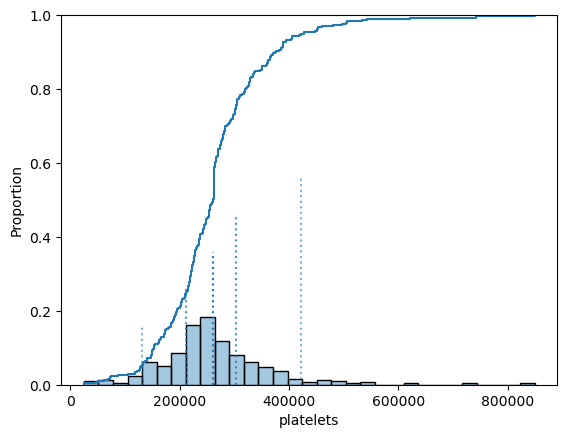

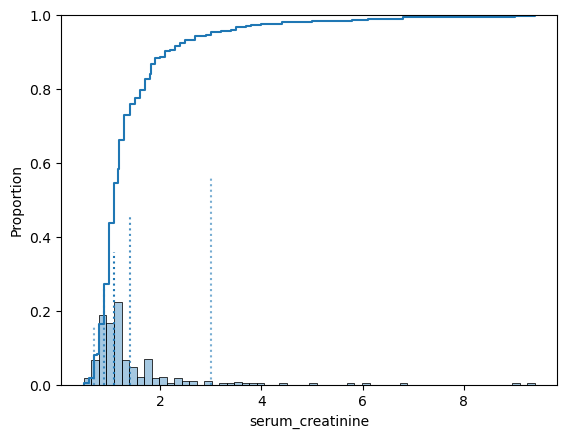

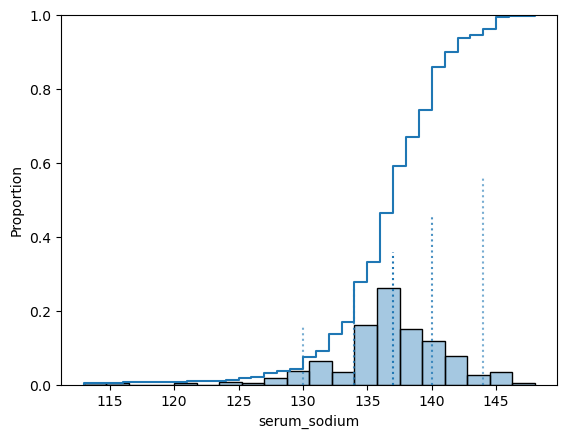

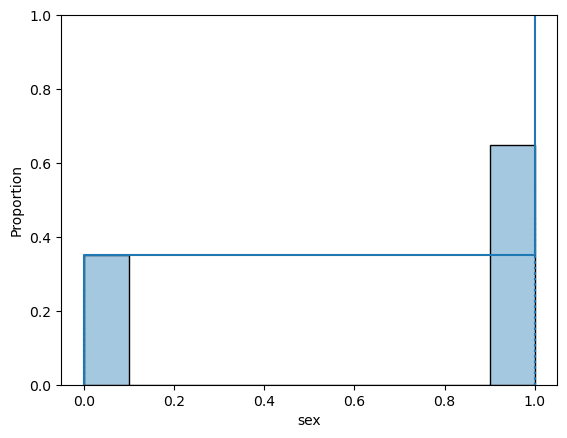

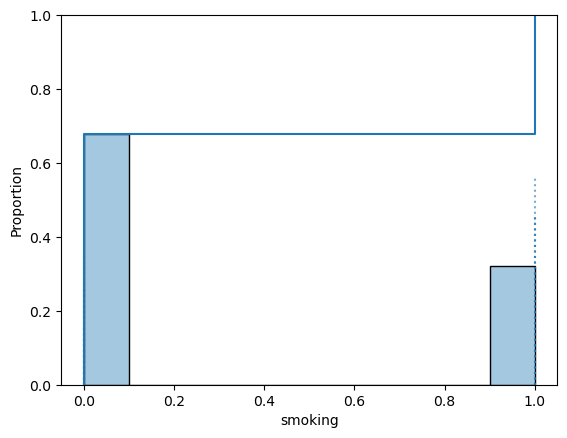

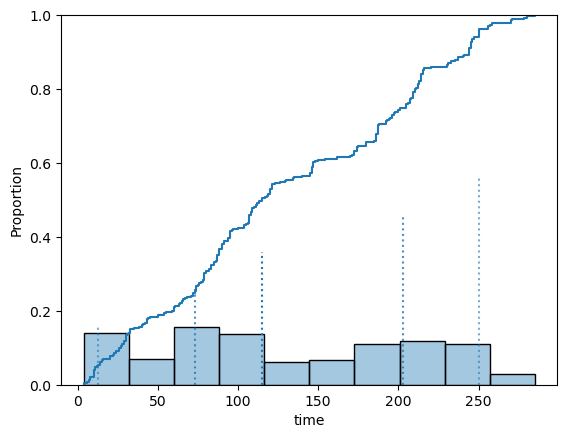

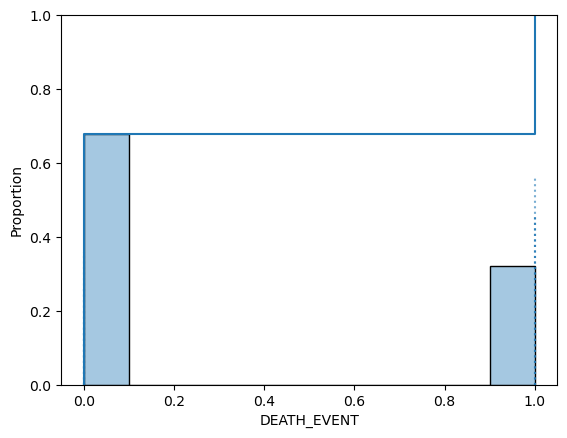

In [345]:

for x in data:
    fig, ax = plt.subplots()
    ax = sns.histplot(data[x], stat="proportion", cumulative=False, alpha=.4)
    sns.ecdfplot(data[x], stat="proportion")
    
    quant_5, quant_25, quant_50, quant_75, quant_95 = data[x].quantile(0.05), data[x].quantile(0.25), data[x].quantile(0.5), data[x].quantile(0.75), data[x].quantile(0.95)

# [quantile, opacity, length]
    quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
    for i in quants:
        ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
    
    plt.show()

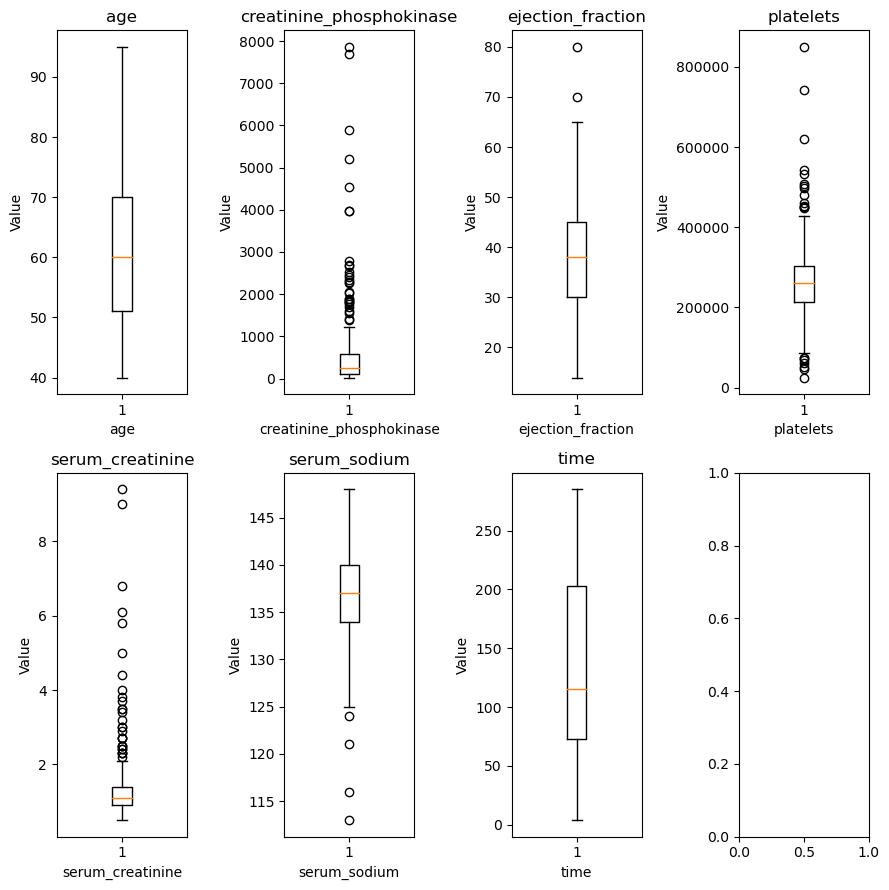

In [346]:
fig, axes = plt.subplots(2, 4, figsize=(9, 9))
cont_var = data[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]

for i, column in enumerate(cont_var.columns):
    row, col = divmod(i, 4) # will return the remainder as the column, adjusting for the row
    ax = axes[row, col]  # Get the corresponding axis
    ax.boxplot(cont_var[column])
    ax.set_title(column)  
    ax.set_xlabel(column)  
    ax.set_ylabel("Value") 

plt.tight_layout()  # Adjust subplot spacing
plt.show()  # Display all the plots

In [347]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(cont_var)
non_outliers_count = []
outliers_count = []
for column in outliers:
    outliers_count.append(outliers[column].value_counts(dropna=True).sum())
    non_outliers_count.append(outliers[column].isnull().sum())

outliers_var = pd.DataFrame(zip(non_outliers_count, outliers_count), columns= ["Non_Outliers", "Outliers"], index= [cont_var.columns])
outliers_var

,Non_Outliers,Outliers
age,299,0
creatinine_phosphokinase,270,29
ejection_fraction,297,2
platelets,278,21
serum_creatinine,270,29
serum_sodium,295,4
time,299,0


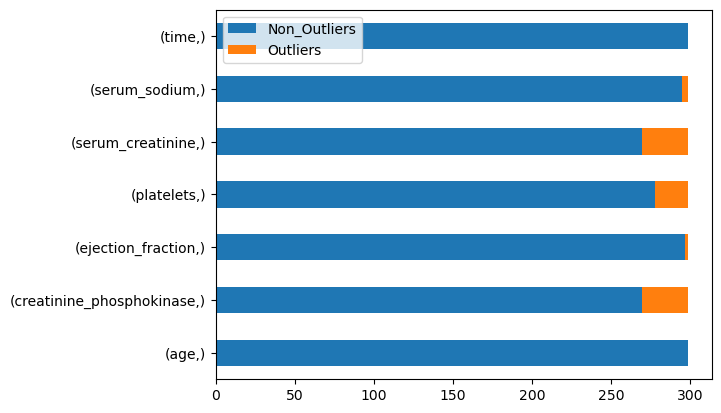

In [348]:
outliers_var.plot(kind= "barh", stacked=True).legend(loc ="upper left")

In [349]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(cont_var)
non_outliers_count = []
outliers_count = []
for column in outliers:
    non_outliers_count.append(outliers[column].value_counts(dropna=True).sum())
    outliers_count.append(outliers[column].isnull().sum())

non_outliers_count = pd.DataFrame(non_outliers_count)
outliers_count = pd.DataFrame(outliers_count)
outliers_var = pd.concat([outliers_count, non_outliers_count], axis = 1, keys = ["Non_outliers", "Outliers"])
outliers_var.columns = outliers_var.columns.droplevel(-1)
outliers_var = outliers_var.T
outliers_var.columns= cont_var.columns.values
outliers_var

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
Non_outliers,299,270,297,278,270,295,299
Outliers,0,29,2,21,29,4,0


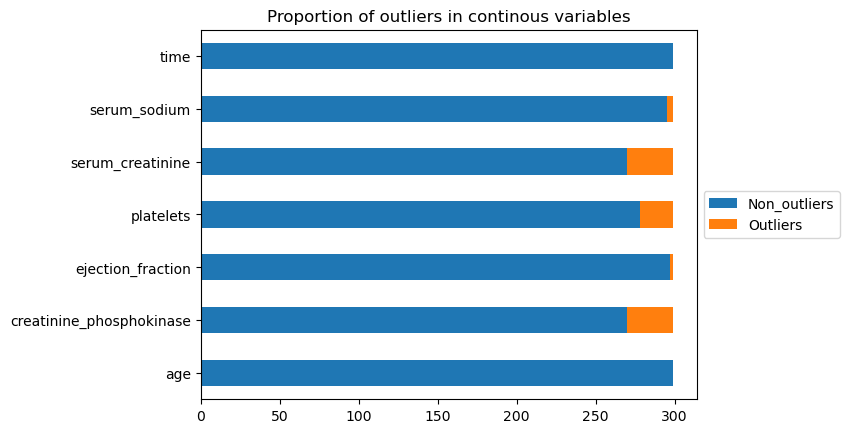

In [350]:
outliers_var.T.plot(kind = "barh", stacked = True, title = "Proportion of outliers in continous variables").legend(loc ="center left", bbox_to_anchor=(1.0, 0.5))

<Axes: >

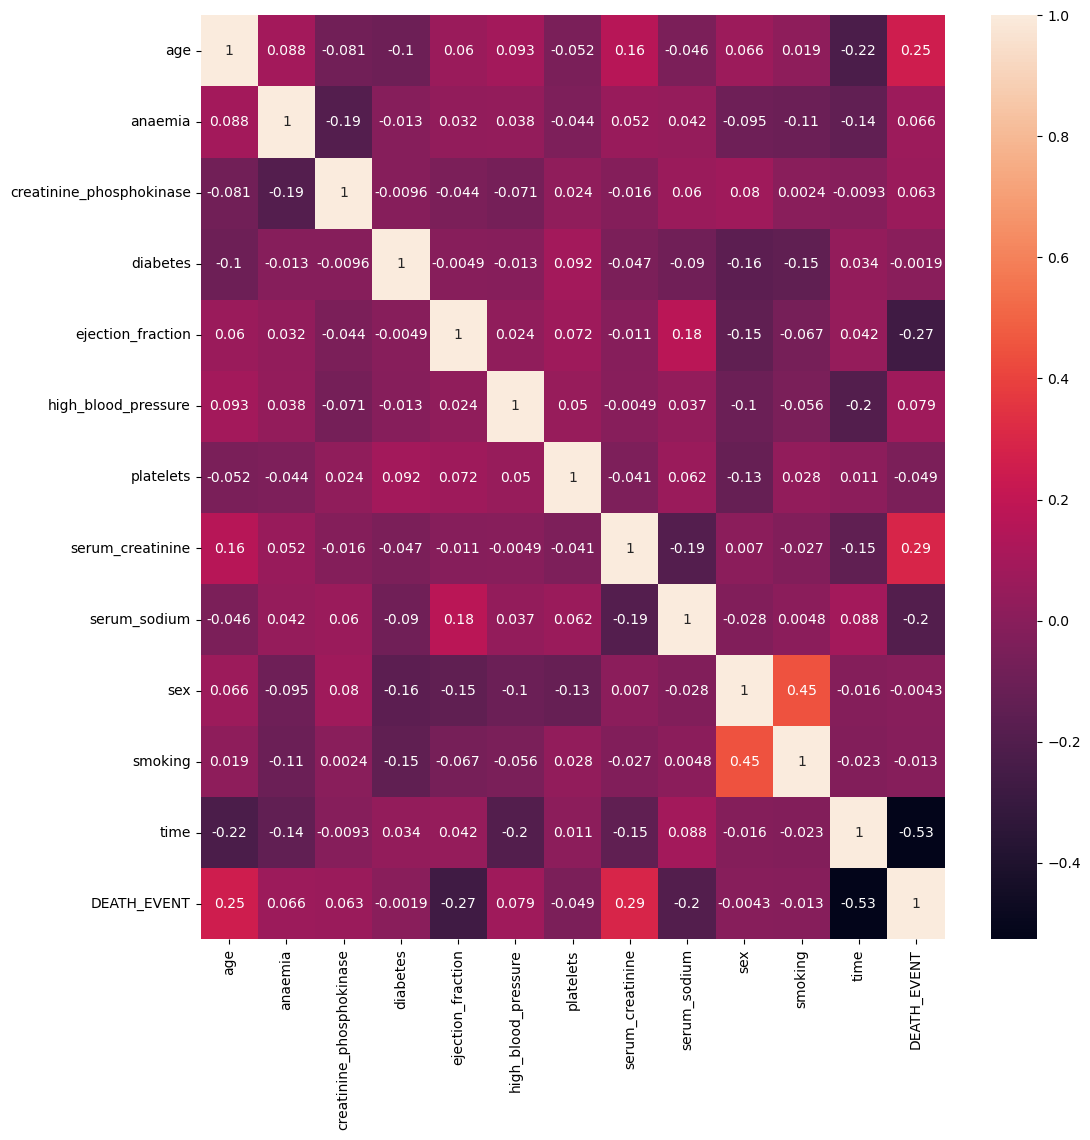

In [351]:
plt.figure(figsize= (12,12))
sns.heatmap(data.corr(), annot = True)

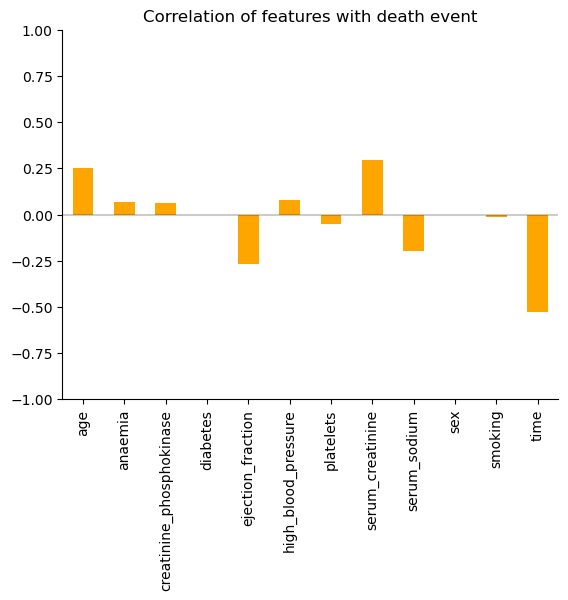

In [352]:

df_DE = data.corr()
df_DE = pd.DataFrame(df_DE["DEATH_EVENT"].iloc[:-1])
with plt.rc_context({
    "axes.spines.right": False,
    "axes.spines.top": False,
}):
    df_DE.plot(kind= "bar", ylim=[-1,1], legend= False, color = "orange")
    plt.title("Correlation of features with death event")
    plt.axhline(0, color = "black", alpha = 0.2)


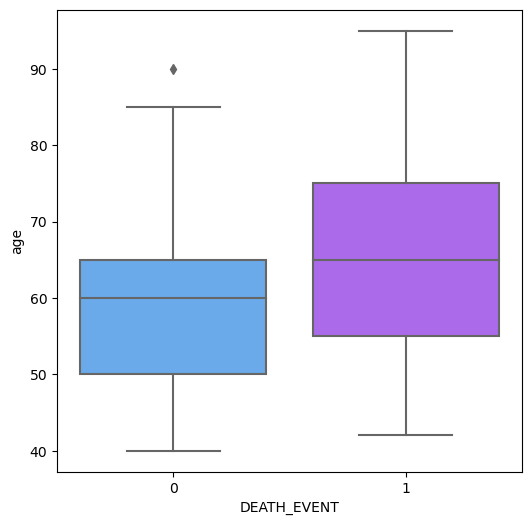

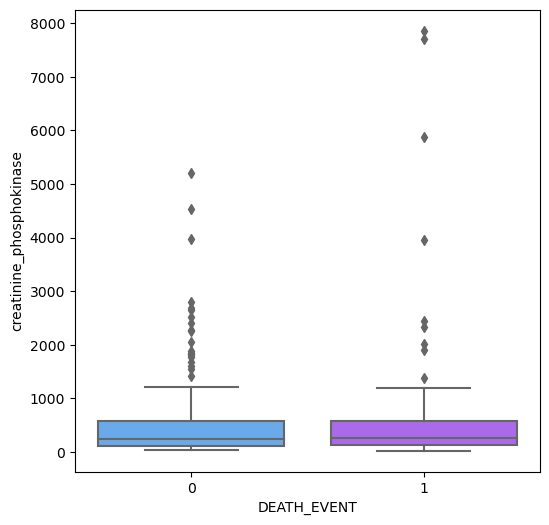

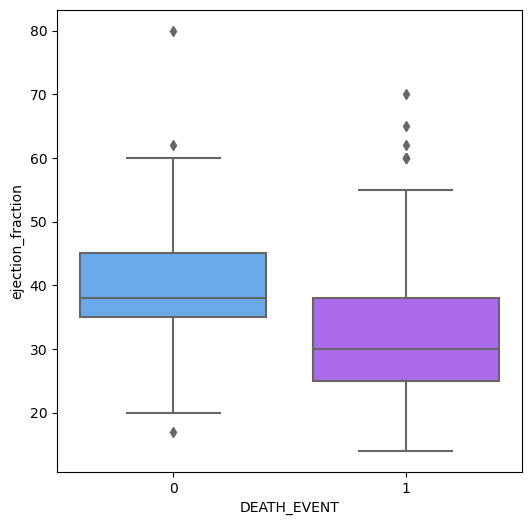

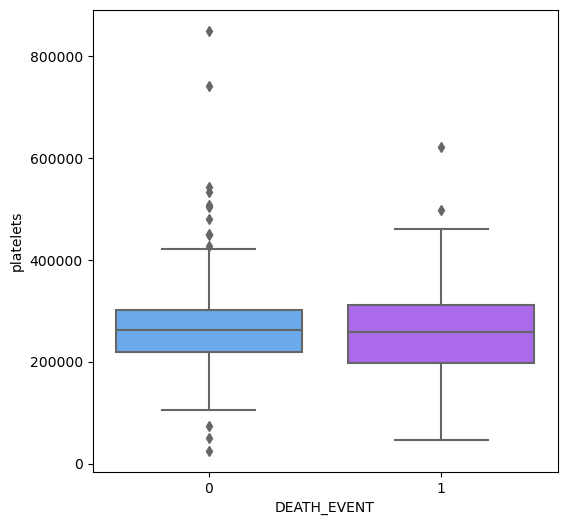

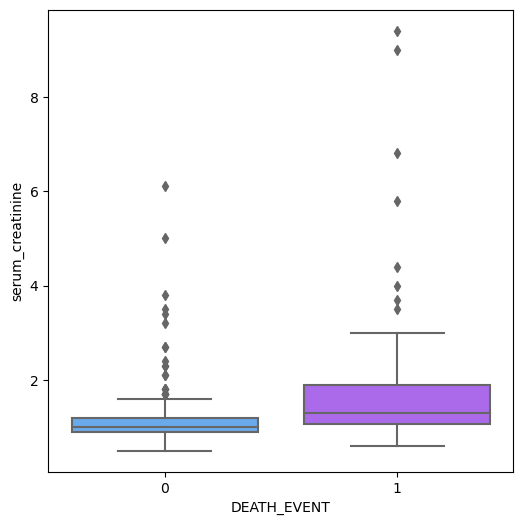

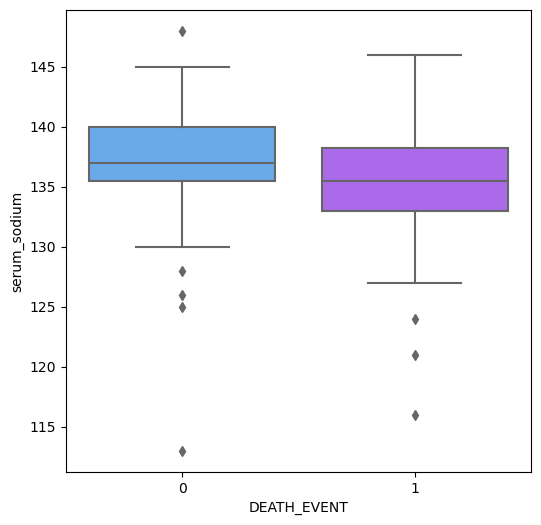

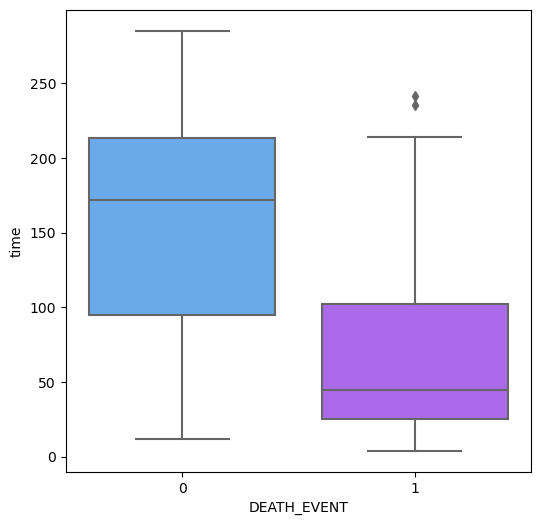

In [353]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(6,6))
    sns.boxplot(x=data["DEATH_EVENT"], y=data[i], palette="cool")
    plt.show()

In [354]:
data.skew()
#as we can see before there are several features highly skewed, some of the models we use later work better with normalisation, likewise are affected heavily by outliers - as seen by the boxplots.
# to help reduce the impact of the outliers, we will set the skewed data to only use up to maxium values from the 95th percentile, platelets will have a min of 10% and max of 90%

age                         0.424172
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

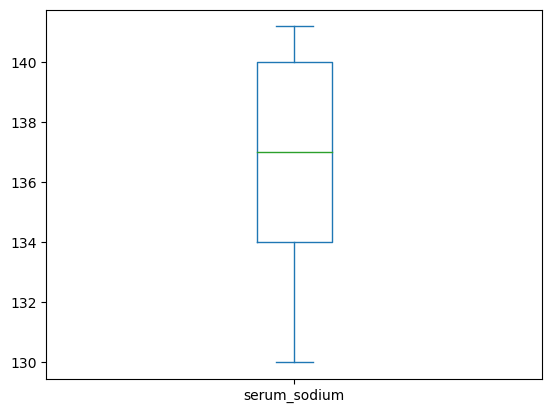

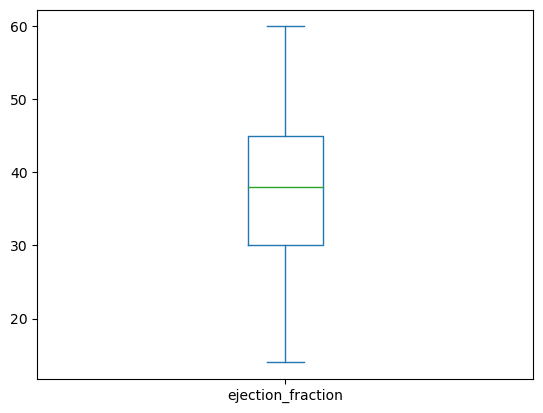

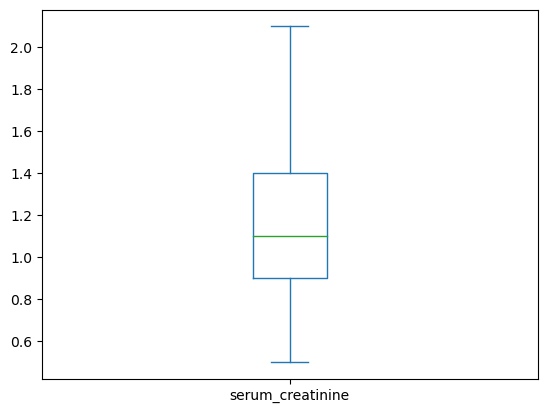

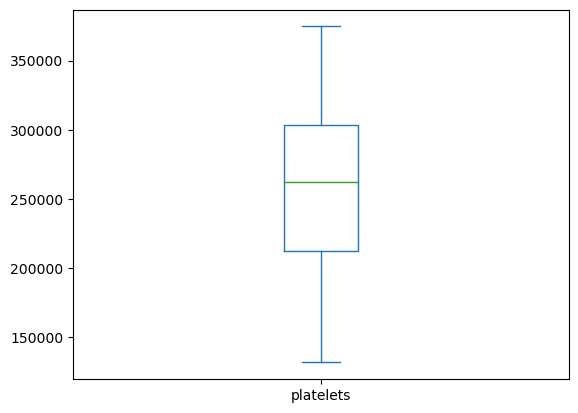

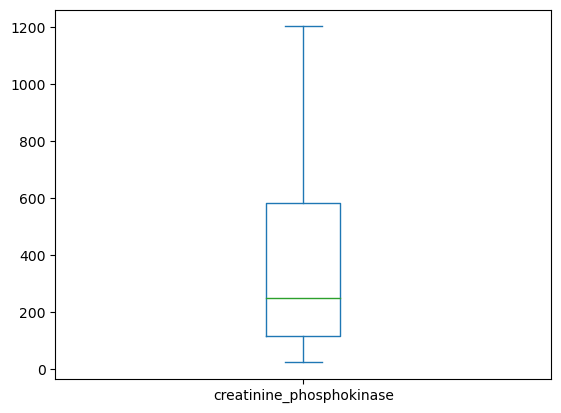

In [355]:
## Data cleaning
## Before any preprocessing, let us check again if there are any structural issues with the data - does not seem to be any missing values
#to deal with the outliers, we have restricted those with outliers outside the lower bound to have a min value of 5th percentile, and all values to a max of 90th percentile
#boxplots to check for outliers
features = ["serum_sodium", "ejection_fraction", "serum_creatinine", "platelets", "creatinine_phosphokinase"]

tenth_percentile = np.percentile(data["platelets"], 5)
data["platelets"] = np.where(data["platelets"]<tenth_percentile, tenth_percentile, data["platelets"]) 

tenth_percentile = np.percentile(data["serum_sodium"], 5)
data["serum_sodium"] = np.where(data["serum_sodium"]<tenth_percentile, tenth_percentile, data["serum_sodium"]) 

for x in features:
    ninetieth_percentile = np.percentile(data[x], 90) 
    data[x] = np.where(data[x]>ninetieth_percentile, ninetieth_percentile, data[x])
    fig, ax = plt.subplots()
    data[x].plot(kind = "box")
    #ax.set_xlabel(f"{x}")
    plt.show()

In [356]:
#to avoid data leakage we preprocess the data after splitting
y = data.iloc[:,-1]
X = data.iloc[:,0:-1]
#dropping time due to data leakage - aka target leakage - this is because the time predictor can reveal the outcome (i.e. time is either up to a threshold or cutoff due to death, if we are predicting death we won't have time since it can be collected after the event)
X = X.drop("time", axis = 1)
X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size=0.8, random_state=32)

In [357]:
X_train.reset_index(inplace= True)
X_test.reset_index(inplace=True)

In [358]:
#preprocessing - standardisation and normalisation before feature selection. Using minmaxscaler to reduce the range but keep the distribution since the scales vary a lot. ANN is not as reliant on normalisation at this stage.
MMS = MinMaxScaler()
scaled_features = ["age", "serum_sodium", "ejection_fraction", "platelets", "creatinine_phosphokinase", "serum_creatinine"]
MMS_scaled_train = pd.DataFrame(MMS.fit_transform(X_train[scaled_features]), columns = ["age", "serum_sodium", "ejection_fraction", "platelets", "creatinine_phosphokinase", "serum_creatinine"])
MMS_scaled_test = pd.DataFrame(MMS.fit_transform(X_test[scaled_features]), columns = ["age", "serum_sodium", "ejection_fraction", "platelets", "creatinine_phosphokinase", "serum_creatinine"])
               

In [359]:
MMS_scaled_train

,age,serum_sodium,ejection_fraction,platelets,creatinine_phosphokinase,serum_creatinine
0,0.363636,0.892857,0.222222,0.256178,0.176152,0.7500
1,0.418182,0.535714,0.444444,0.194399,0.067751,0.2500
2,0.636364,0.357143,0.511111,0.379736,0.064363,1.0000
3,0.254545,0.625000,1.000000,0.079077,0.342141,1.0000
4,0.763636,0.535714,0.777778,0.000000,0.301491,0.5000
...,...,...,...,...,...,...
234,0.327273,0.803571,0.444444,0.000000,0.473408,0.2500
235,0.181818,0.267857,0.666667,0.585667,0.188008,0.3125
236,0.072727,0.803571,0.555556,0.425041,0.051660,0.1250
237,0.581818,0.357143,0.777778,0.355025,0.088076,0.3125


In [360]:
X_train = X_train.drop(scaled_features, axis = 1).drop("index", axis =1)
X_test = X_test.drop(scaled_features, axis = 1).drop("index", axis =1)

X_train = pd.concat((X_train, MMS_scaled_train), axis = 1)
X_test = pd.concat((X_test, MMS_scaled_test), axis = 1)


In [361]:
X_train.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,serum_sodium,ejection_fraction,platelets,creatinine_phosphokinase,serum_creatinine
0,1,1,0,1,0,0.363636,0.892857,0.222222,0.256178,0.176152,0.75
1,1,1,0,1,1,0.418182,0.535714,0.444444,0.194399,0.067751,0.25
2,0,0,1,1,0,0.636364,0.357143,0.511111,0.379736,0.064363,1.00
3,1,0,1,0,0,0.254545,0.625000,1.000000,0.079077,0.342141,1.00
4,1,0,0,1,0,0.763636,0.535714,0.777778,0.000000,0.301491,0.50


In [362]:
X_test.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,serum_sodium,ejection_fraction,platelets,creatinine_phosphokinase,serum_creatinine
0,0,1,0,1,1,0.119048,1.000000,0.456522,1.000000,0.223207,0.428571
1,0,1,0,1,0,0.500000,0.982143,0.521739,0.062603,0.470268,0.357143
2,1,1,0,1,0,0.357143,0.446429,0.565217,0.841021,0.119271,0.357143
3,1,1,0,0,0,0.190476,0.000000,0.891304,0.000000,0.470268,0.857143
4,1,0,1,0,0,0.476190,1.000000,0.347826,0.000000,0.470268,0.142857


In [363]:
#smote to check if y_train data is balanced
y_train.value_counts()

DEATH_EVENT
0    162
1     77
Name: count, dtype: int64

In [364]:
## initialise the neural network
model = Sequential()

#setup the input layer 
model.add(Dense(units = 16, kernel_initializer = "uniform", activation = "relu", input_dim = 11))

## hidden layer
model.add(Dense( units = 8, kernel_initializer = "uniform", activation = "relu"))


# regularisation

model.add(Dropout(0.25)) #drop some of the data to reduce overfitting 

#output layer
model.add(Dense(units = 1, kernel_initializer  = "uniform", activation = "sigmoid"))

#compile the network
## optimizers - adam, sgd, rmsprop-- root mean square propagation
# for binary classification -- binary cross entropy, multiclass classification -- categorical_cross_entrop
model.compile(optimizer = "adam", loss= "binary_crossentropy", metrics= ["accuracy"])


In [365]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 16)                192       
                                                                 
 dense_52 (Dense)            (None, 8)                 136       
                                                                 
 dropout_17 (Dropout)        (None, 8)                 0         
                                                                 
 dense_53 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [366]:
history = model.fit(X_train, y_train, batch_size=15, epochs= 100, validation_split=0.20)

Epoch 1/100


13/13 [==============================] - 1s 13ms/step - loss: 0.6924 - accuracy: 0.6283 - val_loss: 0.6899 - val_accuracy: 0.7500
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.6597 - val_loss: 0.6864 - val_accuracy: 0.7500
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.6597 - val_loss: 0.6814 - val_accuracy: 0.7500
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.6597 - val_loss: 0.6748 - val_accuracy: 0.7500
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.6597 - val_loss: 0.6664 - val_accuracy: 0.7500
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6597 - val_loss: 0.6544 - val_accuracy: 0.7500
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.6597 - val_loss: 0.6411 - val_accuracy: 0.7500
Epoch 8/100
13/13 [=====

In [367]:
model.save("hpredann.keras")

In [368]:
clf_model = tf.keras.models.load_model("hpredann.keras")
y_pred_ann = clf_model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1,0)


2/2 [==============================] - 0s 2ms/step


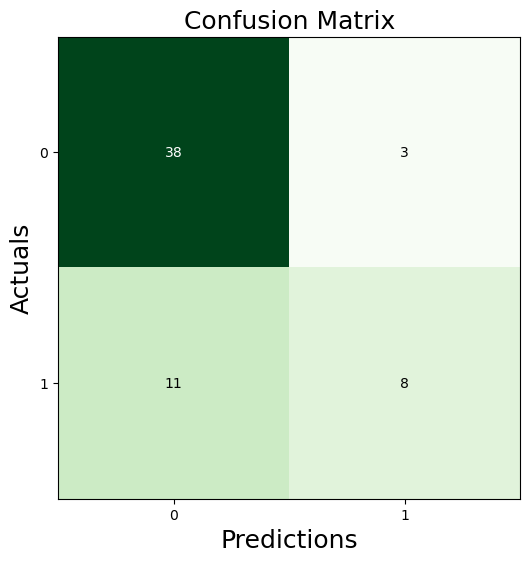

In [369]:
cm = confusion_matrix(y_test, y_pred_ann)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(cm, figsize=(6, 6), cmap='Greens')
ax.set_xlabel('Predictions', fontsize=18)
ax.set_ylabel('Actuals', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=18)
plt.show()

AUC: 0.673941


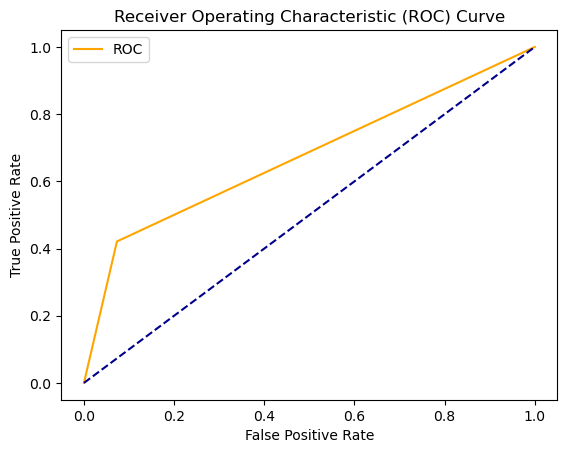

In [370]:
auc_mod2 = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc_mod2)

fpr, tpr, _= roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

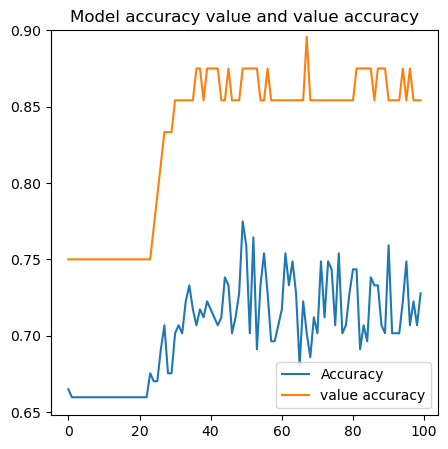

In [382]:
plt.figure(figsize=(5,5))
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "value accuracy")
plt.title("Model accuracy value and value accuracy")
plt.ylim(top = 0.9)
plt.legend()
plt.show()

In [372]:
#using a loop to print the models
model_list = [DecisionTreeClassifier(random_state=32), RandomForestClassifier(n_estimators=15, random_state=32), LogisticRegression(random_state=32), svm.SVC(random_state=32)]

model_name_list = []
model_accuracies = []

for i in model_list:
    model = i.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_name_list.append(model_name)
    model_accuracies.append(accuracy)
    
    print(f"{model_name} accuracy: {accuracy:.3f}\n")
    print(classification_report(y_test, y_pred))

DecisionTreeClassifier accuracy: 0.667

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        41
           1       0.47      0.47      0.47        19

    accuracy                           0.67        60
   macro avg       0.61      0.61      0.61        60
weighted avg       0.67      0.67      0.67        60

RandomForestClassifier accuracy: 0.733

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.57      0.63      0.60        19

    accuracy                           0.73        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.74      0.73      0.74        60

LogisticRegression accuracy: 0.733

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.62      0.42      0.50        19

    accuracy                           0.73        60
   macro avg

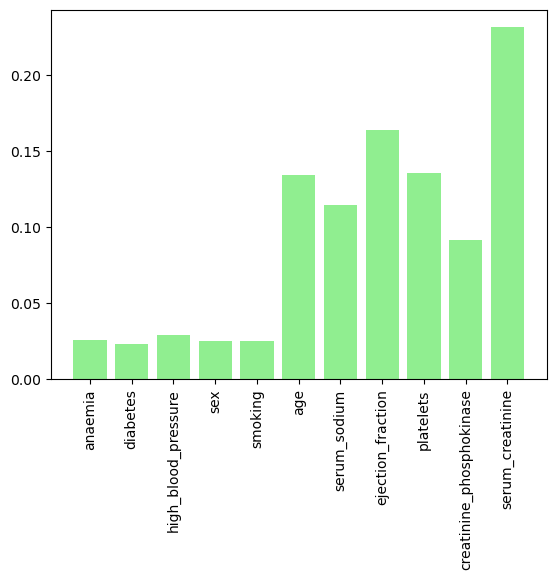

In [373]:
# as we can see most of the models poorly predict the outcome, perhaps it is worth trying a different scaling method or feature selection
model_rnd = RandomForestClassifier(n_estimators=15, random_state=32)
model_rnd.fit(X_train, y_train)
importance = model_rnd.feature_importances_

# plot feature importance
fig, ax = plt.subplots()
plt.bar([x for x in range(len(importance))], importance, color = "lightgreen")
ax.set_xticks(np.arange(len(X_train.columns)))
ax.set_xticklabels(X_train.columns, rotation = 90)
plt.show()


In [374]:
#lets try again but only using the 6 most important features
new_features = ['age', 'serum_sodium', 'ejection_fraction', 'platelets',
        'creatinine_phosphokinase', 'serum_creatinine']


In [375]:
## initialise the neural network
model = Sequential()

#setup the input layer 
model.add(Dense(units = 16, kernel_initializer = "uniform", activation = "relu", input_dim = 6))

## hidden layer
model.add(Dense( units = 8, kernel_initializer = "uniform", activation = "relu"))


# regularisation

model.add(Dropout(0.25)) #drop some of the data to reduce overfitting 

#output layer
model.add(Dense(units = 1, kernel_initializer  = "uniform", activation = "sigmoid"))

#compile the network
## optimizers - adam, sgd, rmsprop-- root mean square propagation
# for binary classification -- binary cross entropy, multiclass classification -- categorical_cross_entrop
model.compile(optimizer = "adam", loss= "binary_crossentropy", metrics= ["accuracy"])

In [376]:
history = model.fit(X_train[new_features], y_train, batch_size=15, epochs= 100, validation_split=0.20)

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 0.6922 - accuracy: 0.6649 - val_loss: 0.6900 - val_accuracy: 0.7500
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.6597 - val_loss: 0.6868 - val_accuracy: 0.7500
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.6597 - val_loss: 0.6833 - val_accuracy: 0.7500
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.6597 - val_loss: 0.6787 - val_accuracy: 0.7500
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.6597 - val_loss: 0.6742 - val_accuracy: 0.7500
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.6597 - val_loss: 0.6685 - val_accuracy: 0.7500
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.6597 - val_loss: 0.6614 - val_accuracy: 0.7500
Epoch 8/100


In [377]:
model.save("hpredann2.keras")

In [379]:
clf_model = tf.keras.models.load_model("hpredann2.keras")
y_pred_ann = clf_model.predict(X_test[new_features])
y_pred_ann = np.where(y_pred_ann > 0.5, 1,0)

2/2 [==============================] - 0s 2ms/step


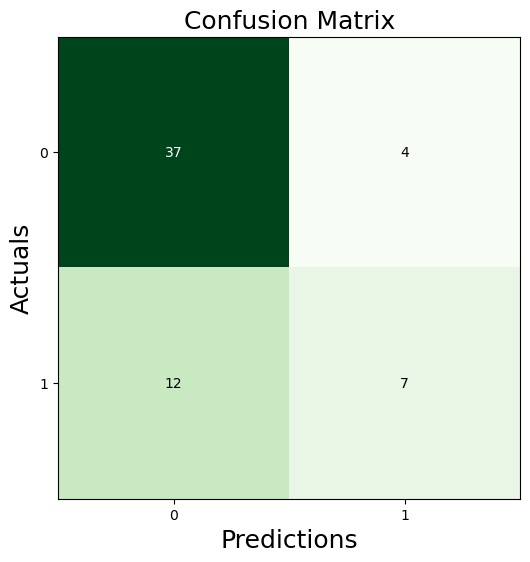

In [380]:
cm = confusion_matrix(y_test, y_pred_ann)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(cm, figsize=(6, 6), cmap='Greens')
ax.set_xlabel('Predictions', fontsize=18)
ax.set_ylabel('Actuals', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=18)
plt.show()

AUC: 0.635430


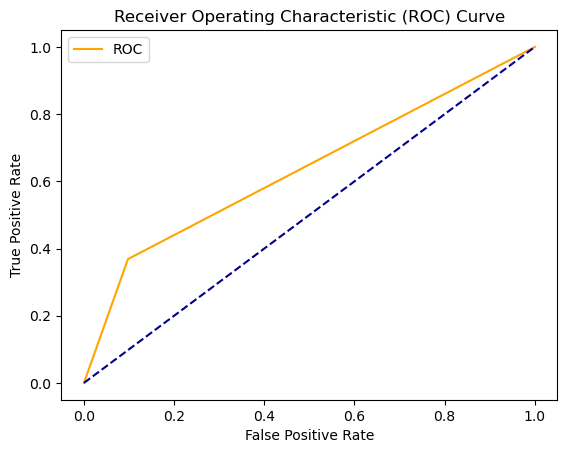

In [381]:
auc_mod2 = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc_mod2)

fpr, tpr, _= roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

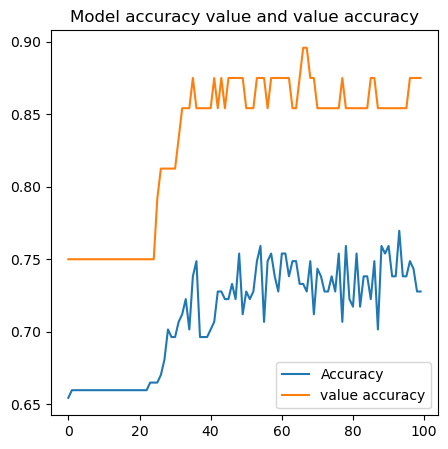

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "value accuracy")
plt.title("Model accuracy value and value accuracy")
plt.legend()
plt.show()

In [ ]:
model_list = [DecisionTreeClassifier(random_state=32), RandomForestClassifier(n_estimators=15, random_state=32), LogisticRegression(random_state=32), svm.SVC(random_state=32)]

model_name_list = []
model_accuracies = []

for i in model_list:
    model = i.fit(X_train[new_features], y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test[new_features])
    accuracy = accuracy_score(y_test, y_pred)
    
    model_name_list.append(model_name)
    model_accuracies.append(accuracy)
    
    print(f"{model_name} accuracy: {accuracy:.3f}\n")
    print(classification_report(y_test, y_pred))

DecisionTreeClassifier accuracy: 0.650

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.45      0.53      0.49        19

    accuracy                           0.65        60
   macro avg       0.61      0.62      0.61        60
weighted avg       0.67      0.65      0.66        60

RandomForestClassifier accuracy: 0.700

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.53      0.53      0.53        19

    accuracy                           0.70        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.70      0.70      0.70        60

LogisticRegression accuracy: 0.733

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        41
           1       0.64      0.37      0.47        19

    accuracy                           0.73        60
   macro avg